# Conexión SQL y uso de Y-DATA PROFILING (AUTOMATIZACIÓN EDA)

In [2]:
#instalación libería para conectar python con mysql 
#%pip install SQLAlchemy pymysql
# #pip install mysql


In [20]:
#Importar librerias
from sqlalchemy import create_engine
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Ingresar credenciales de la base de datos
user = "root"
password = "Lenovo0506"
host = "localhost"
port = 3306
db = "curso2025"


In [5]:
# conexión a la base de datos con mysql
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{db}")

In [6]:
query = """ 

SELECT * FROM con_python.bmw_cars_ventas;;

"""

In [7]:
df_bmw = pd.read_sql(query,engine)

In [8]:
df_bmw.head(10)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232,Low
6,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949,High
7,M5,2014,Asia,Black,Diesel,Automatic,1.6,121156,102778,632,Low
8,X3,2016,South America,White,Diesel,Automatic,1.7,48073,116482,8944,High
9,i8,2019,Europe,White,Electric,Manual,3.0,35700,96257,4411,Low


In [9]:
# Analisis exploratorio de datos
df_bmw.info()  
df_bmw.describe()
df_bmw.columns
df_bmw.isnull().sum()
df_bmw.nunique()
df_bmw.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


Model                    object
Year                      int64
Region                   object
Color                    object
Fuel_Type                object
Transmission             object
Engine_Size_L           float64
Mileage_KM                int64
Price_USD                 int64
Sales_Volume              int64
Sales_Classification     object
dtype: object

In [10]:
from ydata_profiling import ProfileReport

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
#Reporte html del dataframe
# profile = ProfileReport(df_bmw, title = "Reporte EDA ventas BMW", explorative= True)   
# profile.to_file("bmw_ventas_reporte.html")

In [12]:
df_bmw.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

# Primera exploración de los datos

In [15]:
df_bmw.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [16]:
# Estadísticas descritivas basicas
df_bmw.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [19]:
# Analisis de variables categoricas
# distrubución de los modelos vendidos
df_bmw['Model'].value_counts()

Model
7 Series    4666
i3          4618
i8          4606
3 Series    4595
5 Series    4592
X1          4570
X3          4497
X5          4487
M5          4478
X6          4478
M3          4413
Name: count, dtype: int64

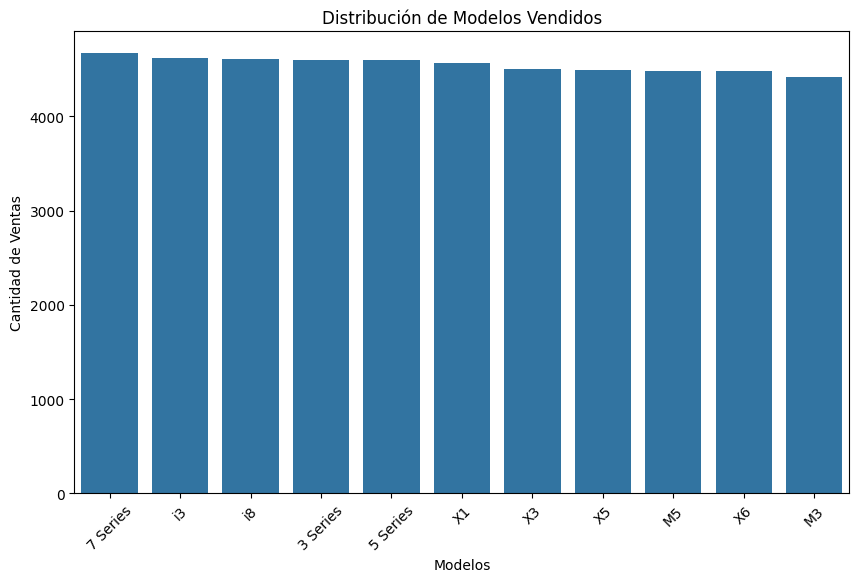

In [21]:
# Graficar distrubución de modelos vendidos
plt.figure(figsize=(10,6))
sns.countplot(data=df_bmw, x='Model', order=df_bmw['Model'].value_counts().index)
plt.title('Distribución de Modelos Vendidos') 
plt.xlabel('Modelos')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_5436\796394268.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_bmw, x='Model', y='Sales_Volume', ci=None)


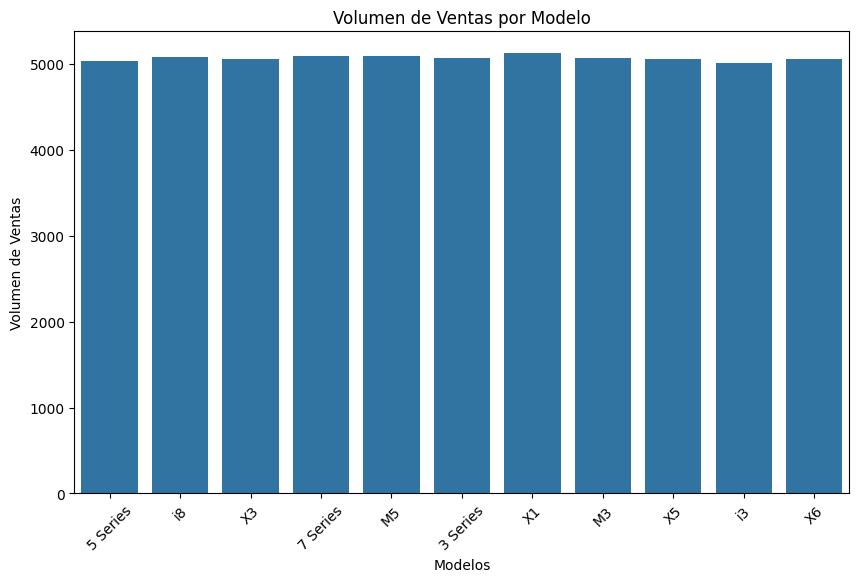

In [22]:
# Graficar distribución de modelos vendidos con grafica de barras agrupando el Model y Sales_volume    
plt.figure(figsize=(10,6))
sns.barplot(data=df_bmw, x='Model', y='Sales_Volume', ci=None)
plt.title('Volumen de Ventas por Modelo')
plt.xlabel('Modelos')
plt.ylabel('Volumen de Ventas')
plt.xticks(rotation=45)
plt.show()

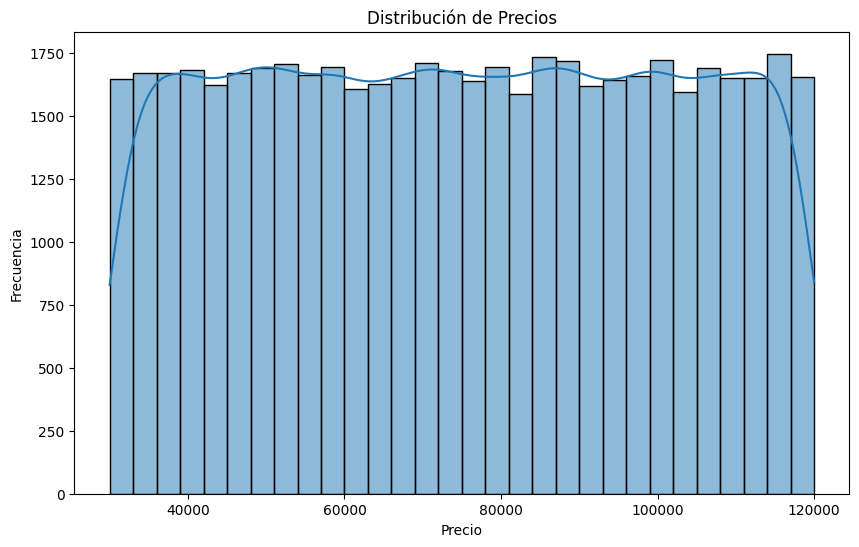

In [23]:
# Grafico de distribución de precios
plt.figure(figsize=(10,6))
sns.histplot(df_bmw['Price_USD'], bins=30, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

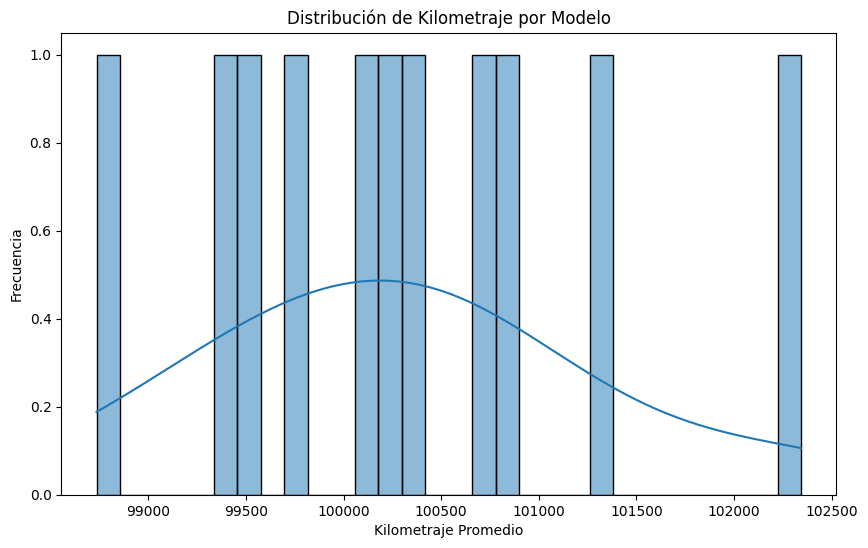

In [24]:
# Agrupar y graficar por modelo y kilometraje
Model_km = df_bmw.groupby('Model')['Mileage_KM'].mean().sort_values(ascending=True)
plt.figure(figsize=(10,6))
sns.histplot(Model_km, bins=30, kde=True)
plt.title('Distribución de Kilometraje por Modelo')
plt.xlabel('Kilometraje Promedio')
plt.ylabel('Frecuencia')
plt.show()

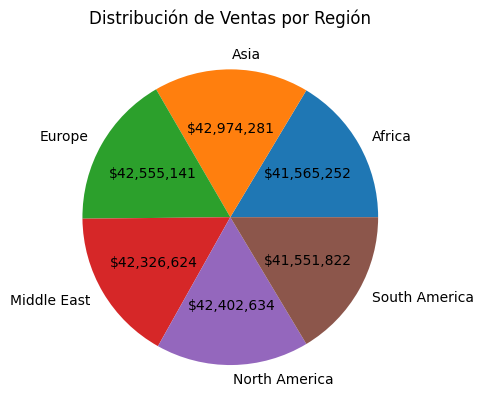

In [25]:
# Gráfico circular para la distribución de ventas
sales_by_region = df_bmw.groupby('Region')['Sales_Volume'].sum()
plt.pie(sales_by_region, labels=sales_by_region.index, autopct=lambda p: f"${p * sales_by_region.sum() / 100:,.0f}")
plt.title('Distribución de Ventas por Región')
plt.show()

Sales_Classification
Low     34754
High    15246
Name: count, dtype: int64


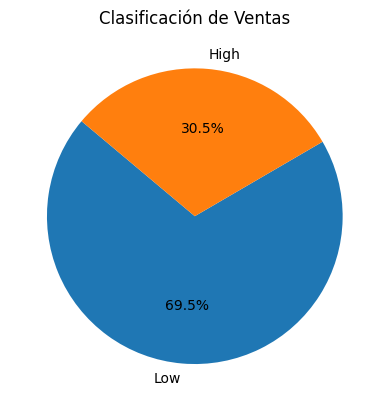

In [26]:
# Gráfico circular para la clasificación de ventas
sales_counts = df_bmw['Sales_Classification'].value_counts()
print(sales_counts)
plt.pie(sales_counts, labels=sales_counts.index, autopct='%1.1f%%',startangle= 140)
plt.title('Clasificación de Ventas')
plt.show()

# Cuando tengo datos desbalanceados puedo utlizar smote, pero me a dar datos sinteticos.
# Random Forest, Gradient boost. 

In [ ]:
# Trabajar con modelos de clasificación robustos para el desbalanceo de clases
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split 
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix



# Limpieza y transformación de datos

In [27]:
# Crear nueva columna de edad del vehículo
from datetime import datetime
current_year = datetime.now().year
df_bmw['Vehicle_Age'] = current_year - df_bmw['Year']

In [28]:
# Promedio de edad de los vehículos vendidos
average_age = df_bmw['Vehicle_Age'].mean()
df_bmw.head()   

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Vehicle_Age
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,9
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,12
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,3
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,1
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,5


In [ ]:
# Eliminar columna Price_Category
# df_bmw = df_bmw.drop(columns=['Price_Category'])

In [29]:
#Categoría por precio, economico, medio, alto
def categorize_price(Price_USD):
    if Price_USD < 20000:
        return 'Económico'
    elif 20000 <= Price_USD < 69900:
        return 'Medio'
    else:
        return 'Alto'

df_bmw['Price_Category'] = df_bmw['Price_USD'].apply(categorize_price)
df_bmw['Price_Category'].head()

0     Alto
1     Alto
2     Alto
3    Medio
4    Medio
Name: Price_Category, dtype: object

In [30]:
#Categoría por km, bajo, medio, alto
def categorize_km(km):
    if km < 50000:
        return 'bajo'
    elif 20000 <= km < 199999:
        return 'Medio'
    else:
        return 'Alto'

df_bmw['km_Category'] = df_bmw['Mileage_KM'].apply(categorize_km)
df_bmw['km_Category'].head()

0    Medio
1    Medio
2     bajo
3     bajo
4    Medio
Name: km_Category, dtype: object

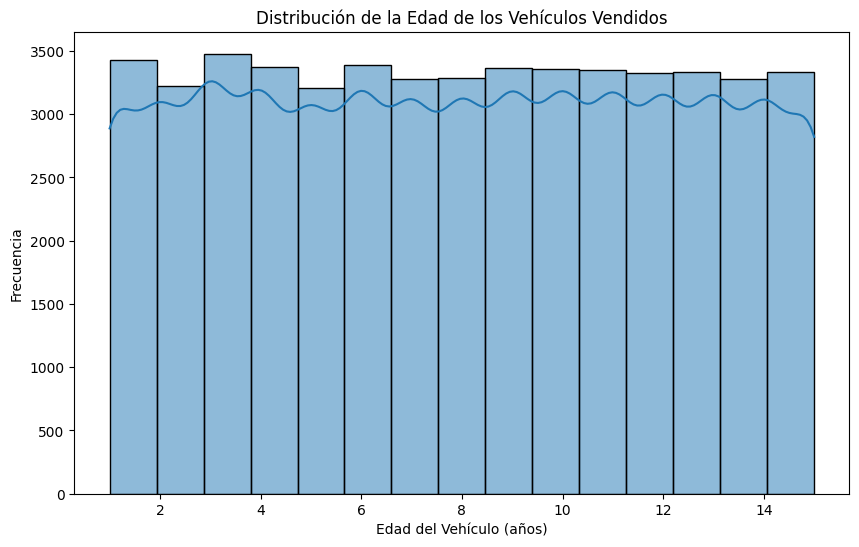

In [31]:
# Crear grafico histograam de la edad de los vehículos vendidos
plt.figure(figsize=(10,6))     
sns.histplot(df_bmw['Vehicle_Age'], bins=15, kde=True)
plt.title('Distribución de la Edad de los Vehículos Vendidos')
plt.xlabel('Edad del Vehículo (años)')
plt.ylabel('Frecuencia')
plt.show()  

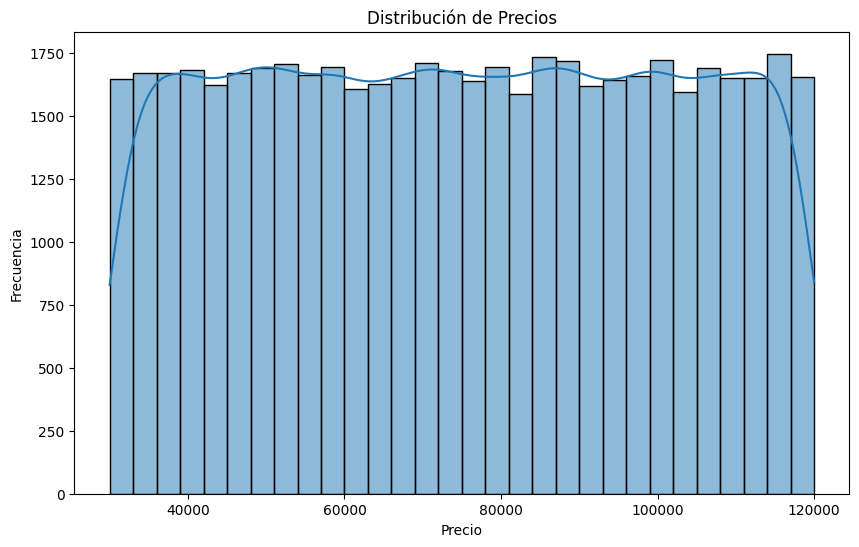

In [32]:
# crear grafica histograma de distribución de precios
plt.figure(figsize=(10,6))
sns.histplot(df_bmw['Price_USD'], bins=30, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


In [33]:
df_bmw['Price_Category'].value_counts()

Price_Category
Alto     27869
Medio    22131
Name: count, dtype: int64

In [34]:
df_bmw.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Vehicle_Age,Price_Category,km_Category
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,9,Alto,Medio
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,12,Alto,Medio
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,3,Alto,bajo
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,1,Medio,bajo
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,5,Medio,Medio


In [35]:
df_bmw.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification', 'Vehicle_Age', 'Price_Category', 'km_Category'],
      dtype='object')

In [ ]:
#%pip install scikit-learn

     ---------------------------------------- 8.9/8.9 MB 11.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier 
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import LabelEncoder
# #

In [47]:
%matplotlib inline


           Feature  Importance
9     Sales_Volume    0.978610
7       Mileage_KM    0.004529
8        Price_USD    0.004455
6    Engine_Size_L    0.002906
0            Model    0.001890
2           Region    0.001421
10     Vehicle_Age    0.001406
1             Year    0.001346
3            Color    0.001326
4        Fuel_Type    0.001053
5     Transmission    0.000523
12     km_Category    0.000273
11  Price_Category    0.000262


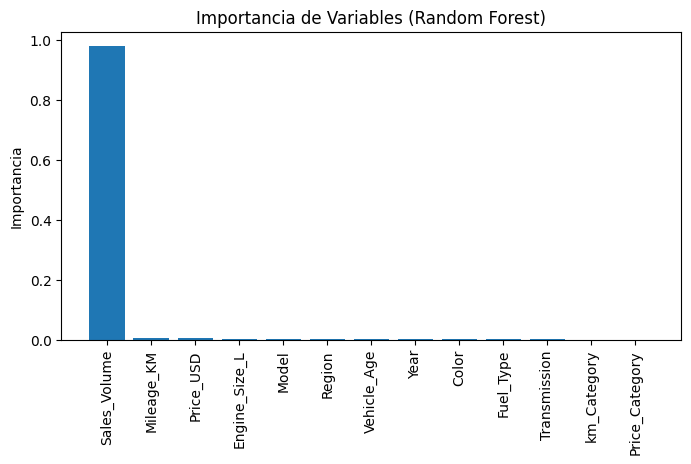

In [ ]:
# # ---------------------------------------------------------
# # 1. Seleccionar las columnas de entrada y la variable objetivo
# # ---------------------------------------------------------
# target = "Sales_Classification"
# X = df_bmw.drop(columns=[target])
# y = df_bmw[target]

# # ---------------------------------------------------------
# # 2. Convertir columnas categóricas a números
# # ---------------------------------------------------------
# encoder = LabelEncoder()

# for col in X.columns:
#     if X[col].dtype == "object":
#         X[col] = encoder.fit_transform(X[col])

# y = encoder.fit_transform(y)

# # ---------------------------------------------------------
# # 3. Separar datos de entrenamiento y prueba
# # ---------------------------------------------------------
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # ---------------------------------------------------------
# # 4. Entrenar modelo Random Forest
# # ---------------------------------------------------------
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# # ---------------------------------------------------------
# # 5. Obtener importancia de variables
# # ---------------------------------------------------------
# importances = pd.DataFrame({
#     "Feature": X.columns,
#     "Importance": model.feature_importances_
# }).sort_values("Importance", ascending=False)

# print(importances)

# # ---------------------------------------------------------
# # 6. Graficar la importancia de variables
# # ---------------------------------------------------------
# plt.figure(figsize=(8, 4))
# plt.bar(importances["Feature"], importances["Importance"])
# plt.xticks(rotation=90)
# plt.title("Importancia de Variables (Random Forest)")
# plt.ylabel("Importancia")
# plt.show()

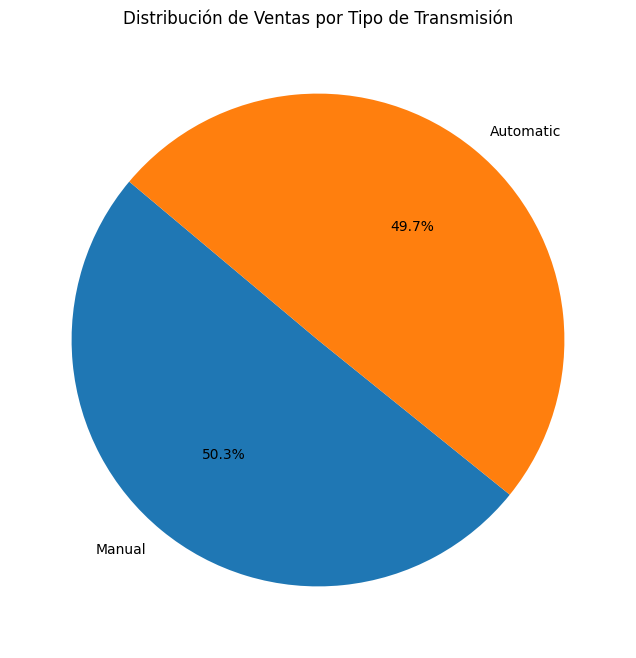

In [61]:
# Distribución por transmisión
# crear grafica pie chart de distribución de precios   
transmission_counts = df_bmw['Transmission'].value_counts()
plt.figure(figsize=(8,8))
transmission_counts.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("Distribución de Ventas por Tipo de Transmisión")
plt.ylabel("")
plt.show()

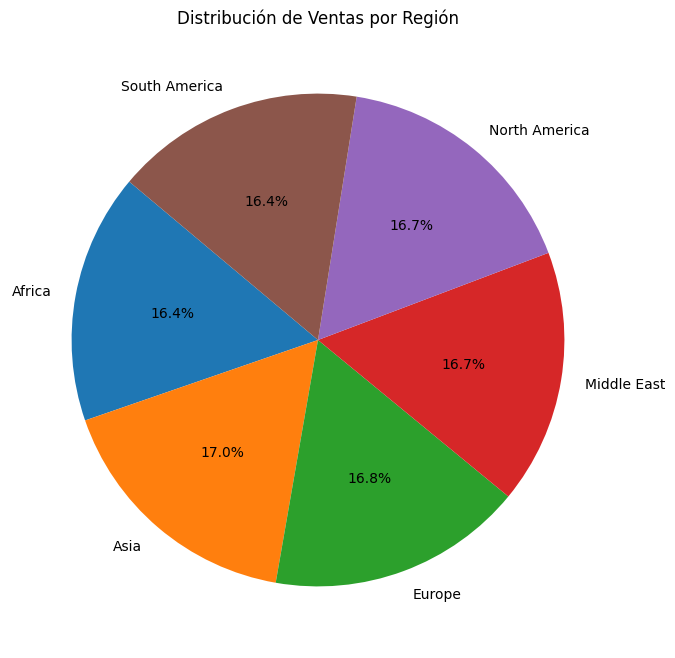

In [60]:
# Destribución de precios por región en un pie chart
sales_by_region = df_bmw.groupby('Region')['Sales_Volume'].sum()    
plt.figure(figsize=(8,8))
sales_by_region.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("Distribución de Ventas por Región")
plt.ylabel("")
plt.show()

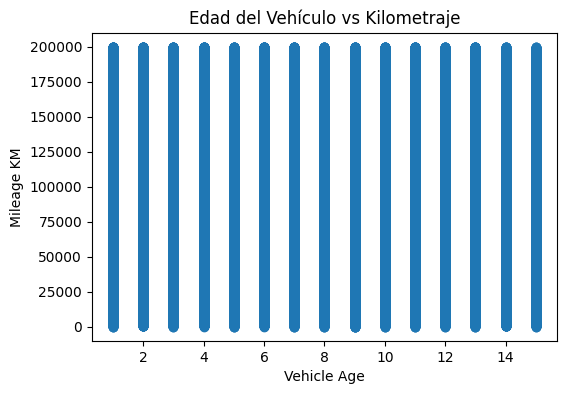

In [ ]:
# Edad del Vehículo vs Kilometraje
plt.figure(figsize=(6,4))
plt.scatter(df_bmw["Vehicle_Age"], df_bmw["Mileage_KM"])
plt.title("Edad del Vehículo vs Kilometraje")
plt.xlabel("Vehicle Age")
plt.ylabel("Mileage KM")
plt.show()

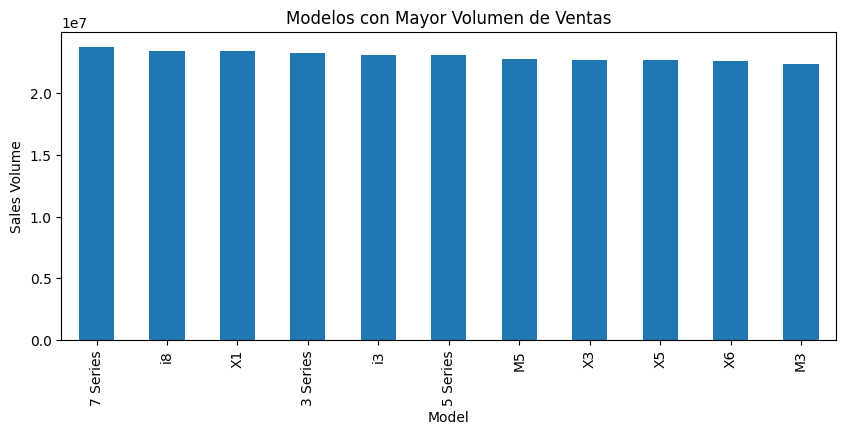

In [ ]:
# Modelos con Mayor Volumen de Ventas
plt.figure(figsize=(10,4))
df_bmw.groupby("Model")["Sales_Volume"].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Modelos con Mayor Volumen de Ventas")
plt.xlabel("Model")
plt.ylabel("Sales Volume")
plt.xticks(rotation=90)
plt.show()

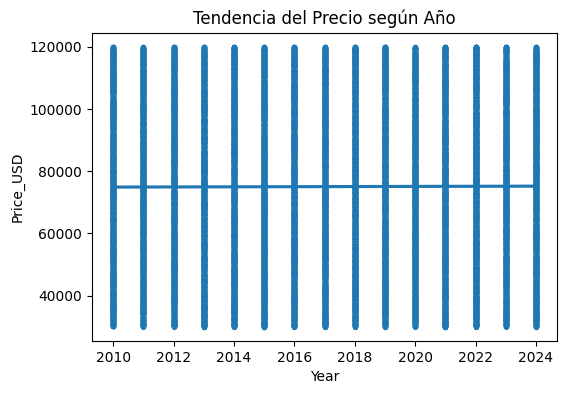

In [ ]:
# Tendencia del Precio según Año
plt.figure(figsize=(6,4))
sns.regplot(data=df_bmw, x="Year", y="Price_USD", scatter_kws={'s':8})
plt.title("Tendencia del Precio según Año")
plt.show()

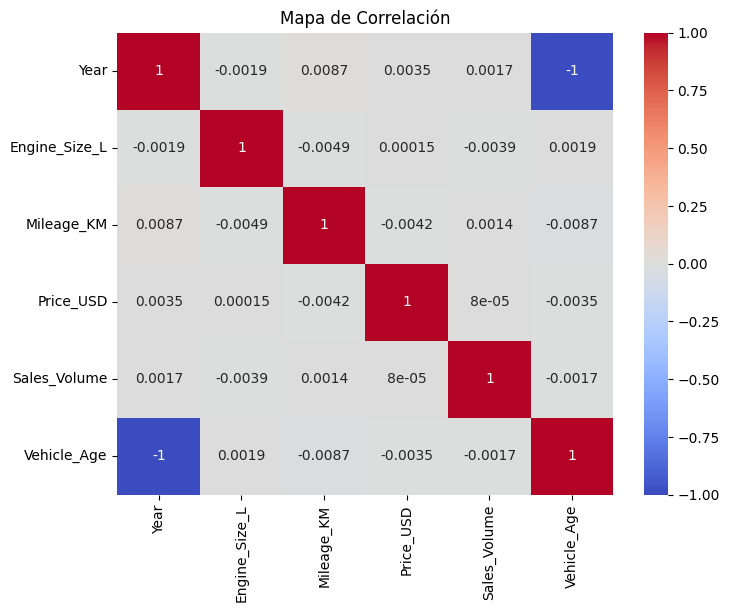